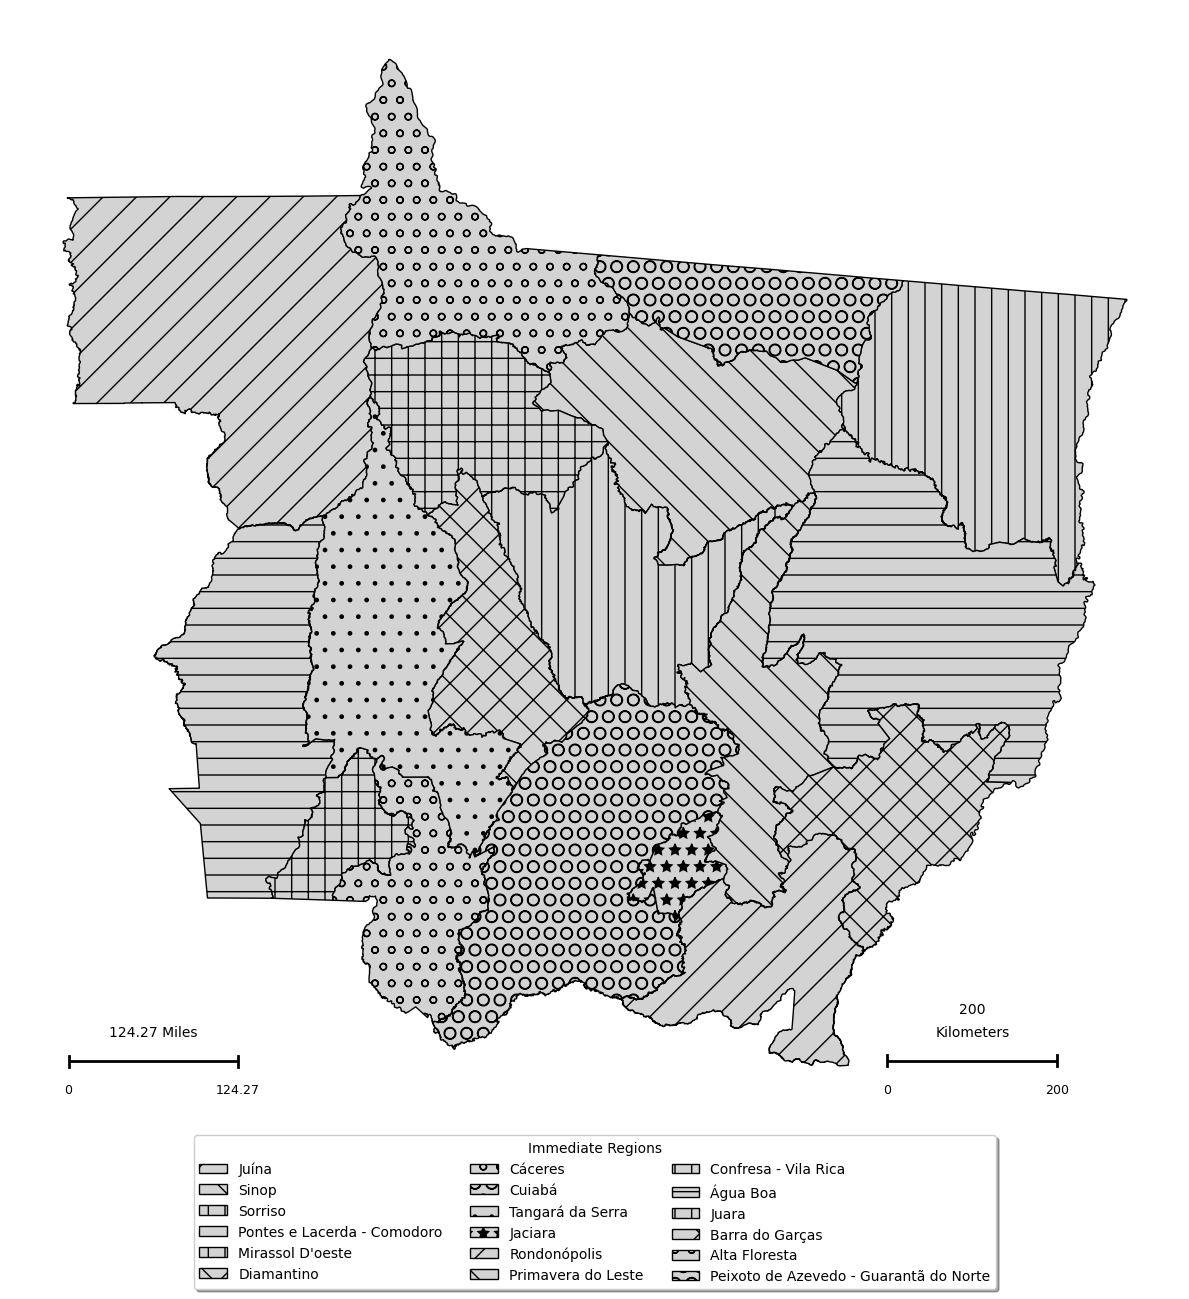

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the path to your shapefile
file_path = r"C:\Users\daves\OneDrive\Pessoal\Artigo\Economic History Review\Code\MT_RG_Imediatas_2024\MT_RG_Imediatas_2024.shp"

# Load the shapefile and project it to a CRS with meters as units
gdf = gpd.read_file(file_path)
gdf = gdf.to_crs(epsg=32721) # UTM zone 21S, units are meters

# --- Plotting Setup ---
fig, ax = plt.subplots(1, 1, figsize=(12, 14))
ax.set_aspect('equal') # Ensure the map has the correct proportions

# Define a list of hatch patterns to cycle through
hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
unique_regions = gdf['NM_RGI'].unique()
legend_handles = []

# Loop through each region to apply a unique hatch pattern
for i, region in enumerate(unique_regions):
    region_gdf = gdf[gdf['NM_RGI'] == region]
    hatch = hatch_patterns[i % len(hatch_patterns)]
    
    region_gdf.plot(ax=ax,
                    facecolor='lightgray',
                    edgecolor='black',
                    hatch=hatch)
    
    legend_handles.append(mpatches.Patch(facecolor='lightgray',
                                         edgecolor='black',
                                         hatch=hatch,
                                         label=region))

# Create the legend from our custom handles
ax.legend(handles=legend_handles,
          title="Immediate Regions",
          loc='upper center',
          bbox_to_anchor=(0.5, -0.01), # Position legend below the plot
          ncol=3,
          fancybox=True,
          shadow=True)

# --- Add Custom Dual Scale Bars ---

# Create a custom kilometers scale bar
def add_kilometers_scale_bar(ax, location="lower right"):
    """Add a custom kilometers scale bar"""
    
    # Get the current axis limits to determine appropriate scale
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Use 200 km as specified
    scale_length_km = 200
    scale_length_m = scale_length_km * 1000  # Convert to meters
    
    # Position the scale bar
    if location == "lower right":
        x_pos = xlim[1] - (xlim[1] - xlim[0]) * 0.25
        y_pos = ylim[0] + (ylim[1] - ylim[0]) * 0.05
    else:
        x_pos = xlim[0] + (xlim[1] - xlim[0]) * 0.05
        y_pos = ylim[0] + (ylim[1] - ylim[0]) * 0.05
    
    # Draw the scale bar line
    ax.plot([x_pos, x_pos + scale_length_m], [y_pos, y_pos], 
            color='black', linewidth=2, solid_capstyle='butt')
    
    # Add tick marks at the ends
    tick_height = (ylim[1] - ylim[0]) * 0.01
    ax.plot([x_pos, x_pos], [y_pos - tick_height/2, y_pos + tick_height/2], 
            color='black', linewidth=2)
    ax.plot([x_pos + scale_length_m, x_pos + scale_length_m], 
            [y_pos - tick_height/2, y_pos + tick_height/2], 
            color='black', linewidth=2)
    
    # Add labels (removed "km" from the main label)
    ax.text(x_pos + scale_length_m/2, y_pos + tick_height*2, 
            'Kilometers', 
            ha='center', va='bottom', fontsize=10, color='black')
    ax.text(x_pos + scale_length_m/2, y_pos + tick_height*4, 
            f'{scale_length_km}', 
            ha='center', va='bottom', fontsize=10, color='black')
    ax.text(x_pos, y_pos - tick_height*2, '0', 
            ha='center', va='top', fontsize=9, color='black')
    ax.text(x_pos + scale_length_m, y_pos - tick_height*2, 
            f'{scale_length_km}', 
            ha='center', va='top', fontsize=9, color='black')

# Add a custom scale bar for miles
def add_miles_scale_bar(ax, location="lower left"):
    """Add a custom miles scale bar"""
    
    # Get the current axis limits to determine appropriate scale
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Use 200 km as the base (same as kilometers scale bar)
    scale_length_km = 200
    scale_length_m = scale_length_km * 1000  # Convert to meters
    
    # Convert to miles with 2 decimal places
    scale_length_miles = scale_length_km * 0.621371
    
    # Position the scale bar
    if location == "lower left":
        x_pos = xlim[0] + (xlim[1] - xlim[0]) * 0.05
        y_pos = ylim[0] + (ylim[1] - ylim[0]) * 0.05
    elif location == "lower right":
        x_pos = xlim[1] - (xlim[1] - xlim[0]) * 0.25
        y_pos = ylim[0] + (ylim[1] - ylim[0]) * 0.05
    else:
        x_pos = xlim[0] + (xlim[1] - xlim[0]) * 0.05
        y_pos = ylim[0] + (ylim[1] - ylim[0]) * 0.05
    
    # Draw the scale bar line
    ax.plot([x_pos, x_pos + scale_length_m], [y_pos, y_pos], 
            color='black', linewidth=2, solid_capstyle='butt')
    
    # Add tick marks at the ends
    tick_height = (ylim[1] - ylim[0]) * 0.01
    ax.plot([x_pos, x_pos], [y_pos - tick_height/2, y_pos + tick_height/2], 
            color='black', linewidth=2)
    ax.plot([x_pos + scale_length_m, x_pos + scale_length_m], 
            [y_pos - tick_height/2, y_pos + tick_height/2], 
            color='black', linewidth=2)
    
    # Add labels with proper decimal formatting
    ax.text(x_pos + scale_length_m/2, y_pos + tick_height*2, 
            f'{scale_length_miles:.2f} Miles', 
            ha='center', va='bottom', fontsize=10, color='black')
    ax.text(x_pos, y_pos - tick_height*2, '0', 
            ha='center', va='top', fontsize=9, color='black')
    ax.text(x_pos + scale_length_m, y_pos - tick_height*2, 
            f'{scale_length_miles:.2f}', 
            ha='center', va='top', fontsize=9, color='black')

# Add the custom scale bars to the plot
add_kilometers_scale_bar(ax, location="lower right")
add_miles_scale_bar(ax, location="lower left")

# Turn off the axes and frame for a clean map
ax.axis('off')

# Adjust layout to prevent the legend from being cut off
# The 'rect' parameter creates space at the bottom for the legend
plt.tight_layout(rect=[0, 0.05, 1, 1]) 

# Display the plot
plt.show()

C:\Users\daves\AppData\Local\Temp\ipykernel_3872\3509924628.py:63: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  start_point = (gdf_mt_state.geometry.centroid.iloc[0].x, gdf_mt_state.geometry.centroid.iloc[0].y)


Map saved as 'inset_map_brazil_mt.jpg' in your current directory.


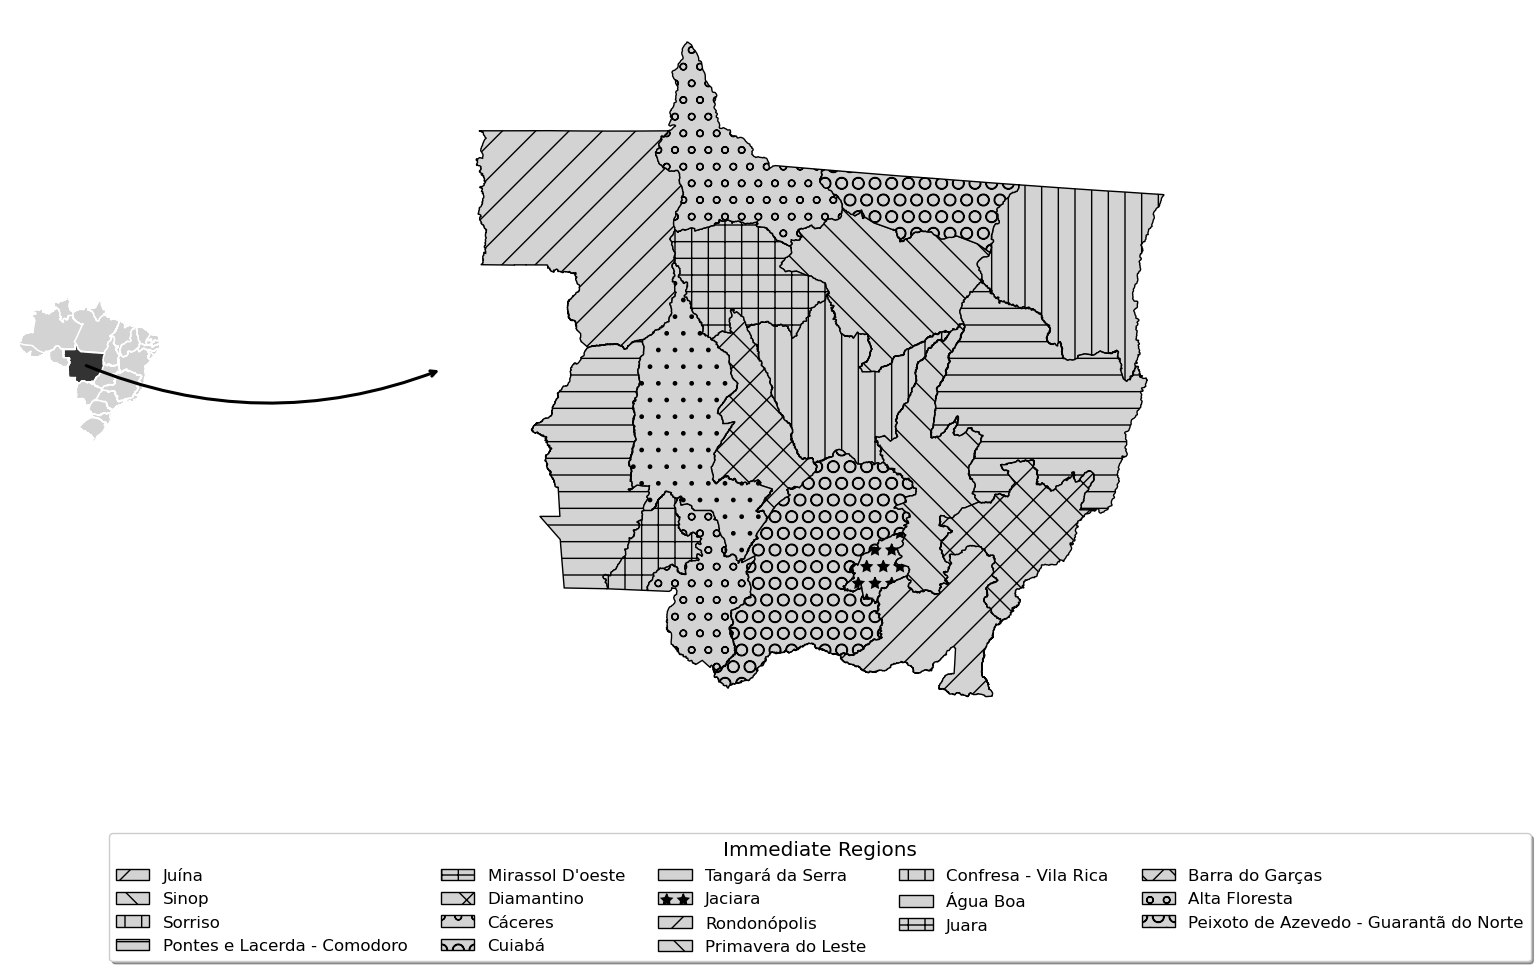

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- 1. DEFINE FILE PATHS ---
brazil_path = r"BR_UF_2024\BR_UF_2024.shp"
mt_regions_path = r"MT_RG_Imediatas_2024\MT_RG_Imediatas_2024.shp"

# --- 2. LOAD AND PREPARE DATA ---
gdf_brazil = gpd.read_file(brazil_path)
gdf_mt_regions = gpd.read_file(mt_regions_path)

gdf_brazil = gdf_brazil.to_crs(epsg=4674)
gdf_mt_regions = gdf_mt_regions.to_crs(epsg=4674)

try:
    gdf_mt_state = gdf_brazil[gdf_brazil['SIGLA_UF'] == 'MT']
except KeyError:
    print("Column 'SIGLA_UF' not found. Trying 'NM_UF' instead.")
    gdf_mt_state = gdf_brazil[gdf_brazil['NM_UF'] == 'Mato Grosso']

# --- 3. SETUP THE PLOT ---
fig = plt.figure(figsize=(18, 12))
fig.patch.set_facecolor('white')

# UPDATED: Both maps are shifted up to make space for the legend at the bottom
ax1 = fig.add_axes([0.05, 0.3, 0.1, 0.6]) 
ax2 = fig.add_axes([0.20, 0.3, 0.6, 0.6]) # Made ax2 slightly wider for balance

# --- 4. PLOT THE MAPS ---
gdf_brazil.plot(ax=ax1, color='lightgray', edgecolor='white')
gdf_mt_state.plot(ax=ax1, color='#333333', edgecolor='white')

hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
unique_regions = gdf_mt_regions['NM_RGI'].unique()
legend_handles = []

for i, region in enumerate(unique_regions):
    region_gdf = gdf_mt_regions[gdf_mt_regions['NM_RGI'] == region]
    hatch = hatch_patterns[i % len(hatch_patterns)]
    region_gdf.plot(ax=ax2,
                    facecolor='lightgray',
                    edgecolor='black',
                    hatch=hatch)
    legend_handles.append(mpatches.Patch(facecolor='lightgray',
                                         edgecolor='black',
                                         hatch=hatch,
                                         label=region))

# --- 5. PLACE THE LEGEND AT THE BOTTOM OF THE FIGURE ---
fig.legend(handles=legend_handles,
           title="Immediate Regions",
           loc='lower center', # Position at the bottom
           bbox_to_anchor=(0.5, 0.1), # Fine-tune position (horizontal center, 10% from bottom)
           ncol=5, # Arrange in 5 columns
           fancybox=True,
           shadow=True,
           fontsize='large',
           title_fontsize='x-large')


# --- 6. DRAW A CONNECTING ARROW ---
start_point = (gdf_mt_state.geometry.centroid.iloc[0].x, gdf_mt_state.geometry.centroid.iloc[0].y)

ax1.annotate("",
             xy=(0, 0.5),
             xycoords=ax2.transAxes,
             xytext=start_point,
             textcoords=ax1.transData,
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=0.2",
                             color="black",
                             lw=2.2)) # UPDATED: Increased arrow thickness

# --- 7. FINAL TOUCHES AND SAVE ---
ax1.axis('off')
ax2.axis('off')

plt.savefig('inset_map_brazil_mt.jpg', dpi=1200, bbox_inches='tight')

print("Map saved as 'inset_map_brazil_mt.jpg' in your current directory.")